In [42]:
import pandas as pd
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
warnings.simplefilter('ignore')
import pyodbc
import sqlite3

In [43]:
SQLEXPRESSservername = 'LAPTOP-4SN45QMD\SQLEXPRESS'

In [44]:
UO_conn = pyodbc.connect('DRIVER={SQL SERVER};SERVER='+SQLEXPRESSservername+';DATABASE=UnitedOutdoors; Trusted_Connection=yes')
odCursor = UO_conn.cursor()
odCursor

In [45]:
order_details = pd.read_sql_query('SELECT * FROM dbo.order_details', UO_conn)
order_details.dtypes


order_details_sk         int64
order_id                 int64
product_quantity         int64
product_listprice      float64
order_date              object
shipping_date           object
product_productid        int64
product_sk               int64
employee_employeeid    float64
employee_sk            float64
customer_id             object
customer_sk              int64
source                  object
dtype: object

In [46]:
order_details['purchaseamount'] = order_details['product_quantity'] * order_details['product_listprice']
order_details
grouped_order_details = order_details.groupby('customer_id')['purchaseamount'].sum().reset_index()
grouped_order_details = grouped_order_details.rename(columns={'purchaseamount': 'totalpurchaseamount'})
grouped_order_details.sort_values('totalpurchaseamount', ascending=False)

order_details_freq = order_details[['customer_id', 'order_date']]
order_details_freq = order_details_freq.drop_duplicates(subset=['customer_id', 'order_date'])
order_details_freq
customer_order_counts = order_details_freq.groupby('customer_id').size().reset_index(name='amountoforders')
customer_order_counts

,customer_id,amountoforders
0,101,11
1,102,8
2,103,8
3,104,11
4,105,6
...,...,...
19312,WARTH,15
19313,WELLI,9
19314,WHITC,14
19315,WILMK,7


In [47]:
amt_purquan = customer_order_counts.merge(grouped_order_details, on='customer_id')
amt_purquan

,customer_id,amountoforders,totalpurchaseamount
0,101,11,5748.00
1,102,8,3624.00
2,103,8,4080.00
3,104,11,6684.00
4,105,6,3540.00
...,...,...,...
19312,WARTH,15,16617.10
19313,WELLI,9,6480.70
19314,WHITC,14,29073.45
19315,WILMK,7,3161.35


       amountoforders  totalpurchaseamount  Centrum
0                  11              5748.00        0
1                   8              3624.00        0
2                   8              4080.00        0
3                  11              6684.00        0
4                   6              3540.00        0
...               ...                  ...      ...
19312              15             16617.10        0
19313               9              6480.70        0
19314              14             29073.45        0
19315               7              3161.35        0
19316               7              3531.95        0

[19317 rows x 3 columns]


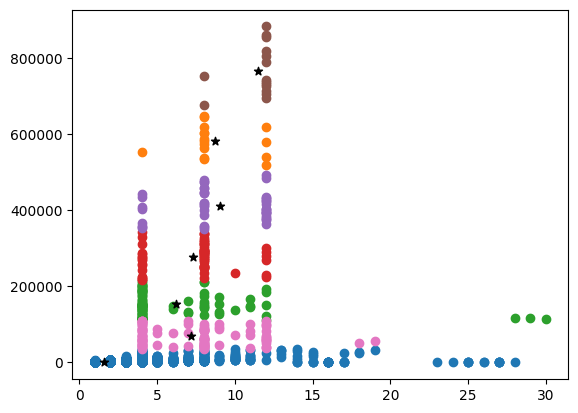

In [48]:
X = amt_purquan[['amountoforders', 'totalpurchaseamount']]
kmeans = KMeans(n_clusters = 7, random_state = 405)
kmeans.fit_predict(X[['amountoforders', 'totalpurchaseamount']])
centers = kmeans.cluster_centers_
labels = kmeans.labels_
X['Centrum'] = labels
print(X)
for i in range(7):
    cluster = X[X['Centrum'] == i]
    plt.scatter(cluster['amountoforders'], cluster['totalpurchaseamount'])
    plt.scatter(centers[i, 0], centers[i, 1], color='black', marker='*')

plt.show()

In [49]:
scaler = MinMaxScaler()

scaler.fit(X[['totalpurchaseamount']])
X['totalpurchaseamount'] = scaler.transform(X[['totalpurchaseamount']])

scaler.fit(X[['amountoforders']])
X['amountoforders'] = scaler.transform(X[['amountoforders']])
X

,amountoforders,totalpurchaseamount,Centrum
0,0.344828,0.006513,0
1,0.241379,0.004106,0
2,0.241379,0.004623,0
3,0.344828,0.007574,0
4,0.172414,0.004011,0
...,...,...,...
19312,0.482759,0.018833,0
19313,0.275862,0.007344,0
19314,0.448276,0.032951,0
19315,0.206897,0.003582,0


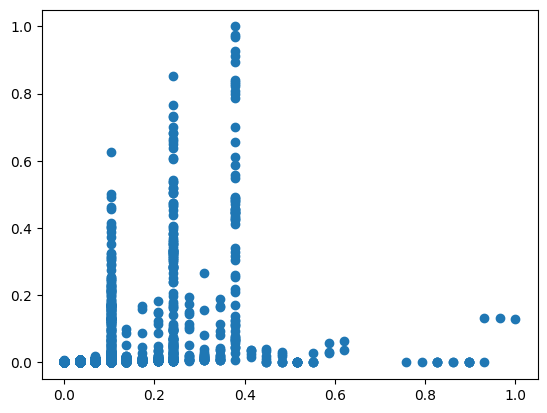

In [50]:
plt.scatter(X['amountoforders'], X['totalpurchaseamount'])

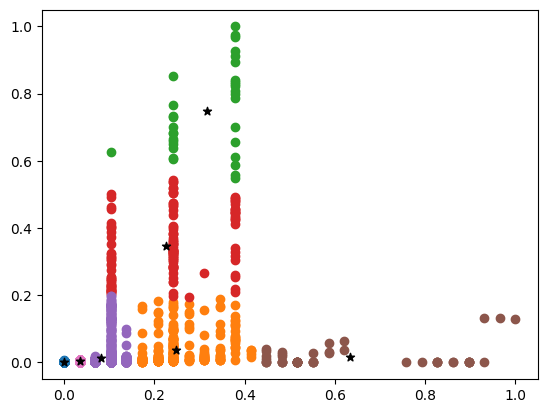

In [51]:
predicted = kmeans.fit_predict(X[['amountoforders','totalpurchaseamount']])
X['Centrum'] = predicted
centers = kmeans.cluster_centers_
labels = kmeans.labels_
X['Centrum'] = labels
for i in range(7):
    cluster = X[X['Centrum'] == i]
    plt.scatter(cluster['amountoforders'], cluster['totalpurchaseamount'])
    plt.scatter(centers[i, 0], centers[i, 1], color='black', marker='*')

plt.show()

# HORIZONTAAL IS AMOUNT_OF_ORDERS. | VERTICAAL IS TOTAL_PURCHASE_AMOUNT